In [1]:
import h5py
import scri
import numpy as np
import matplotlib.pyplot as plt
import wget
import os
import json

In [4]:
import subprocess

def runcmd(cmd, verbose = False, *args, **kwargs):

    process = subprocess.Popen(
        cmd,
        stdout = subprocess.PIPE,
        stderr = subprocess.PIPE,
        text = True,
        shell = True
    )
    std_out, std_err = process.communicate()
    if verbose:
        print(std_out.strip(), std_err)
    pass

In [5]:
for i in range(13):
    os.mkdir(f"./CCE_waveforms/{i+1:04d}/")

In [6]:
for i in range(13):
    for j in range(5):
        os.mkdir(f"./CCE_waveforms/{i+1:04d}/Lev{j+1}")

In [2]:
zenodonums = ["4734836", "4734902", "4734942", "4735038", "4735071",
              "4735115", "4735163", "4735213", "4735279", "4735322", 
              "4735374", "4735424", "4735478"]
radexts = [292, 261, 250, 236, 274, 273, 270, 305, 270, 235, 222, 223, 237]

reponumdict = {}
for i, num in enumerate(zenodonums):
    reponumdict[f"{i+1:04d}"] = num


In [7]:
for i in range(13):
    radext = radexts[i]
    Lev = 5
    filestoget = [f'Lev{Lev}/metadata.json',
                  f'Lev{Lev}/rhOverM_BondiCce_R{radext:04d}_CoM.json',
                  f'Lev{Lev}/rMPsi4_BondiCce_R{radext:04d}_CoM.json',
                  f'Lev{Lev}/r2Psi3_BondiCce_R{radext:04d}_CoM.json',
                  f'Lev{Lev}/r3Psi2OverM_BondiCce_R{radext:04d}_CoM.json',
                  f'Lev{Lev}/r4Psi1OverM2_BondiCce_R{radext:04d}_CoM.json',
                  f'Lev{Lev}/r5Psi0OverM3_BondiCce_R{radext:04d}_CoM.json',
                  f'Lev{Lev}/rhOverM_BondiCce_R{radext:04d}_CoM.h5',
                  f'Lev{Lev}/rMPsi4_BondiCce_R{radext:04d}_CoM.h5',
                  f'Lev{Lev}/r2Psi3_BondiCce_R{radext:04d}_CoM.h5',
                  f'Lev{Lev}/r3Psi2OverM_BondiCce_R{radext:04d}_CoM.h5',
                  f'Lev{Lev}/r4Psi1OverM2_BondiCce_R{radext:04d}_CoM.h5',
                  f'Lev{Lev}/r5Psi0OverM3_BondiCce_R{radext:04d}_CoM.h5']

    reponum = f"{i+1:04d}"
    zenodonum = reponumdict[reponum]
    print(zenodonum)
    for filename in filestoget:
        folder = f"./CCE_waveforms/{reponum}"
        filepath = f"CCE_waveforms/{reponum}/{filename}"
        url = f"https://zenodo.org/record/{zenodonum}/files/{filename}?download=1"
        # print(url)
        # print(f"wget -O {folder}/{filename} {url}")
        # runcmd(f"wget -O {folder}/{filename} {url}", verbose = False)

4734836
4734902
4734942
4735038
4735071
4735115
4735163
4735213
4735279
4735322
4735374
4735424
4735478


In [8]:
[_, h, Psi4, Psi3, Psi2, Psi1, Psi0, 
_, _, _, _, _, _] = [f"{folder}/{filename}" for filename in filestoget]

In [9]:
abd = scri.SpEC.create_abd_from_h5(h=h,Psi4=Psi4,Psi3=Psi3,Psi2=Psi2,
                                   Psi1=Psi1,Psi0=Psi0,file_format ='RPXMB')

In [10]:
CCEnum = 1
Lev = 5
radext = radexts[CCEnum-1]
folder = f"./CCE_waveforms/{CCEnum:04d}"
filestoget = [f'Lev{Lev}/rhOverM_BondiCce_R{radext:04d}_CoM.json',
          f'Lev{Lev}/rMPsi4_BondiCce_R{radext:04d}_CoM.json',
          f'Lev{Lev}/r2Psi3_BondiCce_R{radext:04d}_CoM.json',
          f'Lev{Lev}/r3Psi2OverM_BondiCce_R{radext:04d}_CoM.json',
          f'Lev{Lev}/r4Psi1OverM2_BondiCce_R{radext:04d}_CoM.json',
          f'Lev{Lev}/r5Psi0OverM3_BondiCce_R{radext:04d}_CoM.json']
[h, Psi4, Psi3, Psi2, Psi1, Psi0] = [f"{folder}/{filename}" for filename in filestoget]
abd = scri.SpEC.create_abd_from_h5(h=h,Psi4=Psi4,Psi3=Psi3,Psi2=Psi2,
                               Psi1=Psi1,Psi0=Psi0,file_format ='RPXMB')
transformations, abd_prime = abd.transformations_to_map_to_superrest_frame(t_0=6000)

AttributeError: 'AsymptoticBondiData' object has no attribute 'transformations_to_map_to_superrest_frame'

In [23]:
abd_prime

NameError: name 'abd_prime' is not defined

In [17]:
with open(f"{folder}/Lev{Lev}/metadata.json") as f:
        metadata = json.load(f)

In [2]:
with open(f"./CCE_waveforms/0001/Lev5/metadata.json") as f:
        metadata = json.load(f)

In [3]:
mass = metadata["remnant_mass"]
spin = np.linalg.norm(metadata["remnant_dimensionless_spin"])
print(mass, spin)

0.951619189699 0.686441922817


In [5]:
print(metadata["remnant_dimensionless_spin"][2])

0.686441922817


In [7]:
for i in range(1, 13):
    with open(f"./CCE_waveforms/{i:04}/Lev5/metadata.json") as f:
        metadata = json.load(f)
        print(metadata["remnant_dimensionless_spin"][2])

0.686441922817
0.746428620809
0.803761187632
0.857808919072
0.686299702021
0.685872904094
0.685153400758
0.602026193714
0.678561988326
0.471626482505
0.685985852802
0.671989833308


In [10]:
np.linalg.norm(metadata["remnant_dimensionless_spin"])

0.6719898333080015

In [22]:
l, m = 9, 4
np.array(abd_prime.sigma.bar[:, abd_prime.sigma.bar.index(l,m)]).real

NameError: name 'abd_prime' is not defined

In [21]:
h22_CCE_mine = abd_prime.sigma.bar[:, abd_prime.sigma.bar.index(l,m)]
fig, ax = plt.subplots()
tmax_CCE = abd_prime.t[h22_CCE_mine.argmax()]
ax.semilogy(abd_prime.t - tmax_CCE, h22_CCE_mine)
ax.set_xlim(0, 200)

NameError: name 'abd_prime' is not defined

In [5]:
h22_CCE_mine = abd_prime.sigma.bar[:, abd_prime.sigma.bar.index(l,m)]

In [6]:
SXS_file = h5py.File('./rhOverM_Asymptotic_GeometricUnits_CoM.h5','r')

In [7]:
h22_SXS = SXS_file['Extrapolated_N3.dir']['Y_l2_m2.dat'][:]
t_SXS,h22_SXS_mine = h22_SXS[:,0], h22_SXS[:,1] + 1j*h22_SXS[:,2]

In [8]:
tmax_SXS = t_SXS[np.argmax(np.abs(h22_SXS_mine))]
tmax_CCE = abd.t[h22_CCE_mine.argmax()]

In [9]:
%matplotlib notebook

<IPython.core.display.Javascript object>


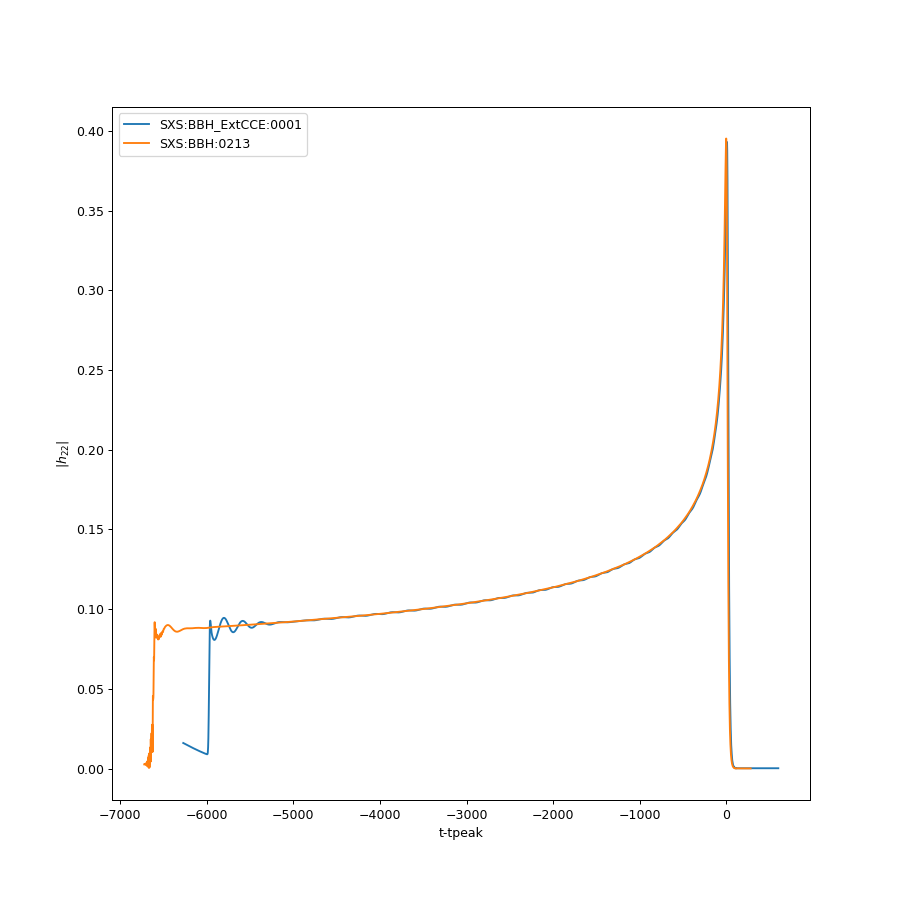

Text(0, 0.5, '$|h_{22}|$')

In [10]:
plt.figure(figsize=(10,10))
plt.plot(abd_prime.t-tmax_CCE,np.abs(2.*h22_CCE_mine.ndarray),label='SXS:BBH_ExtCCE:0001')
plt.plot(t_SXS-tmax_SXS,np.abs(h22_SXS_mine),label='SXS:BBH:0213')
plt.legend(loc='best')
plt.xlabel('t-tpeak')
plt.ylabel('$|h_{22}|$')

<IPython.core.display.Javascript object>


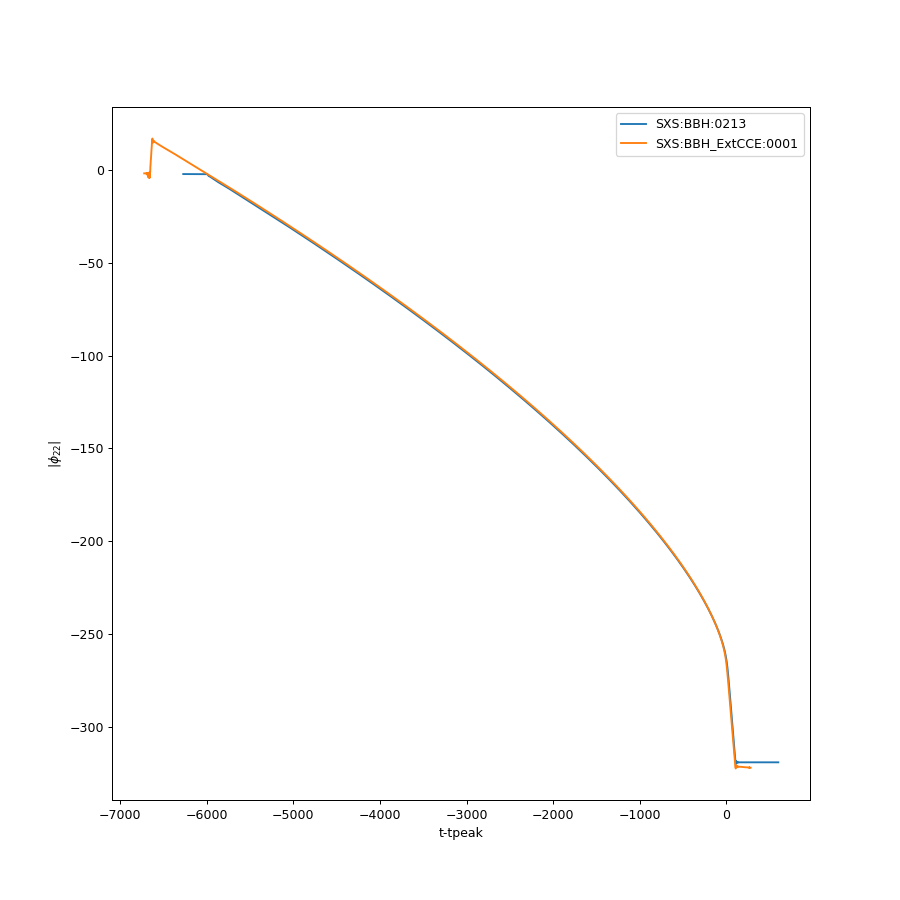

Text(0, 0.5, '$|\\phi_{22}|$')

In [11]:
plt.figure(figsize=(10,10))
plt.plot(abd_prime.t-tmax_CCE,np.unwrap(np.angle(h22_CCE_mine.ndarray)),label='SXS:BBH:0213')
plt.plot(t_SXS-tmax_SXS,np.unwrap(np.angle(h22_SXS_mine)),label='SXS:BBH_ExtCCE:0001')
plt.legend(loc='best')
plt.xlabel('t-tpeak')
plt.ylabel('$|\phi_{22}|$')

In [28]:
np.imag(h22_CCE_mine.ndarray)

array([-7.34926881e-03, -7.33627295e-03, -7.32327755e-03, ...,
       -5.19323732e-05, -5.19343446e-05, -5.19362635e-05])

## Save 22 mode

In [13]:
np.savetxt('SXS:BBH_ExtCCE:0001_h22.dat',np.column_stack((abd_prime.t,2.*np.real(h22_CCE_mine.ndarray),2.*np.imag(h22_CCE_mine.ndarray))),header="time Re(h22) Im(h22)", comments='')

# q = 4

In [3]:

abd = scri.SpEC.create_abd_from_h5(h='./q4/rhOverM_BondiCce_R0235_CoM.json',Psi4=f'./q4/rMPsi4_BondiCce_R0235_CoM.json',Psi3=f'./q4/r2Psi3_BondiCce_R0235_CoM.json',Psi2=f'./q4/r3Psi2OverM_BondiCce_R0235_CoM.json',Psi1=f'./q4/r4Psi1OverM2_BondiCce_R0235_CoM.json',Psi0=f'./q4/r5Psi0OverM3_BondiCce_R0235_CoM.json',file_format ='RPXMB')

In [11]:
transformations, abd_prime = abd.transformations_to_map_to_superrest_frame(t_0=4850)

space_translation: tolerance achieved in 5 iterations!
supertranslation: tolerance achieved in 6 iterations!
rotation: tolerance achieved in 1 iterations!
CoM: tolerance achieved in 6 iterations!


In [12]:
l, m = 2,2
h22_CCE_mine = abd_prime.sigma.bar[:, abd_prime.sigma.bar.index(l,m)]

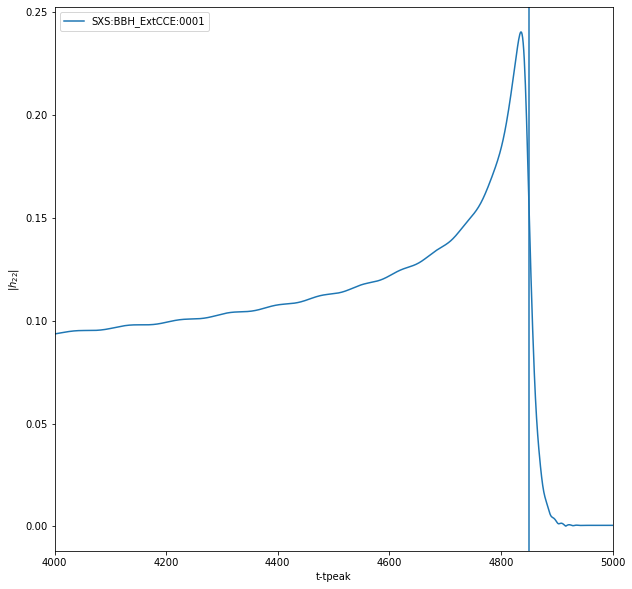

In [14]:
plt.figure(figsize=(10,10))
plt.plot(abd_prime.t,np.abs(2.*h22_CCE_mine.ndarray),label='SXS:BBH_ExtCCE:0001')
plt.legend(loc='best')
plt.xlabel('t-tpeak')
plt.ylabel('$|h_{22}|$')
plt.xlim(4000,5000)
plt.axvline(4850)

## Save 22 mode

In [15]:
np.savetxt('SXS:BBH_ExtCCE:0010_h22.dat',np.column_stack((abd_prime.t,2.*np.real(h22_CCE_mine.ndarray),2.*np.imag(h22_CCE_mine.ndarray))),header="time Re(h22) Im(h22)", comments='')